# UCN LD2 Calculations: Helical Groove as a Straight Tube

K. Augusto, J. Martin

June 9/20

In [4]:
#!/usr/bin/python3

from math import *

from mpl_toolkits import mplot3d

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from numpy import *

In [34]:
p_psi=20. # PSI
p=p_psi*6894.76 # Pa
kt=0.104 # W/(m*K) a
T=Tin=23.4 # (K) inlet temp
Tw=20.7 # (K) temperature of cold wall
mdot=0.004 # kg/s
mu=3.5e-5 # Pa*s
L=10*0.0254 #m length of tube
rho=163.0 # kg/m^3
Cp=6565.4 # J/(kg*K)
Ngrooves=1 # number of grooves where it was found that the optimal groove is 1
D=4.76*0.0254 #m diameter of tube, 0.015949 from optimizing dp in backwards-hex-turbulent-tube.py
wprime= 0.015 #m width of groove
uprime= 0.01 # m width between grooves
depth=0.015 # m depth of groove

To find the pitch angle:

\begin{equation}
\alpha = \arcsin{(\frac{N(w'+u')}{\pi D}}
\end{equation}

where w' is the width of the groove, u' is the width between the grooves, N is the number of grooves, and D is the diameter of the Copper tube where the helical grooves are cut.

In [35]:
sinalpha=(Ngrooves*(wprime + uprime))/(pi*D) #pitch angle
alpha=arcsin(sinalpha)
print('The pitch angle is %f' %alpha)

The pitch angle is 0.065866


In [33]:
Lprime=L/sinalpha #m length of wound groove
print('The length of the groove is %f m.' %Lprime)

appturns=Lprime/(pi*D)
print('Coiling around a Cu rod of diameter %f m would require approximately %f turns'%(D,appturns))

turns=L/(tan(alpha)*pi*D)
print('Coiling around a Cu rod of diameter %f m would require %f turns'%(D,turns))

The length of the groove is 3.859084 m.
Coiling around a Cu rod of diameter 0.120904 m would require approximately 10.160000 turns
Coiling around a Cu rod of diameter 0.120904 m would require 10.137969 turns


The flow area of the helical fin is found from:

\begin{equation}
A = Nw'depth
\end{equation}

The flow perimeter of the helical fin is found from:

\begin{equation}
P = 2N(depth + w')
\end{equation}

In [7]:
w=wprime*tan(alpha) # m

ahelix=Ngrooves*wprime*depth # m^2 area of one helical groove/fin thing

print('The area of the helical fins is %f m^2.'%ahelix)

phelix=Ngrooves*(2*depth+2*wprime) #m

print('The perimeter of the helical grooves is %f m.' %phelix)

The area of the helical fins is 0.000225 m^2.
The perimeter of the helical grooves is 0.060000 m.


The hydraluic diameter is found from:

\begin{equation}
D_h = \frac{4A}{P}
\end{equation}

The Mass flux per unit area is found from:

\begin{equation}
G = \frac{\dot{m}}{A}
\end{equation}

In [37]:
Dh=4*ahelix/phelix #m
print('Hydraulic diameter %f m'%Dh)
G=mdot/ahelix # (kg/(m^2*s)) mass flow rate per unit area
print('Mass flux per unit area is %f kg/(m^2*s)'%G)

Hydraulic diameter 0.015000 m
Mass flux per unit area is 17.777778 kg/(m^2*s)


The Reynolds Number is found from:

\begin{equation}
Re = \frac{D_hG}{\mu}
\end{equation}

In [9]:
Re=Dh*G/mu # should be dimensionless
print('The Reynolds number is %f'%Re)

The Reynolds number is 7619.047619


The friction factor is found from:

\begin{equation}
f = 0.316Re^{(-1/4)}
\end{equation}

In [10]:
fRe=24.00*4

if Re < 2300 :
    f=fRe/Re
    #f=64/Re #assuming cicular tube
    print('The laminar friction factor is %f.' %f)
elif 3500 > Re > 2300 :
    f=1.2036*Re**(-0.416) #from vijayan
    print('The friction factor is in between laminar and turbulent')
elif Re > 3500 :
    f=0.316*Re**(-0.25)
    print('The turbulent friction factor is %f.' %f)

The turbulent friction factor is 0.033823.


The Colburn factor is found from:

\begin{equation}
jH = 0.023Re^{-1/5}B_1
\end{equation}

In [11]:
B1=1.174*((3.7e-5)/(3.68e-5))**(0.14) #viscosity taken from cams sheets
print('This is B1 %f.' %B1)


if Re < 3500 :
    print('It is laminar or in between')
elif Re > 3500 :
    jh=0.023*Re**(-0.2)*B1
    print('The Colburn factor for the turbulent flow is %f.' %jh)

This is B1 1.174891.
The Colburn factor for the turbulent flow is 0.004522.


The Prandelt Number is found from:

\begin{equation}
Pr = \frac{\mu C_p}{k_t}
\end{equation}

The Nusselt Number is found from:

\begin{equation}
Nu = jHRePr^{1/3}
\end{equation}

In [22]:
Pr=(mu*Cp)/(kt) # yes still dimensionless
               # because (Pa*s)*(J/(kg*K))/(W/(m*K))
               # =((kg*m/(s^2*m^2))*s)*(W*s/(kg*K))*((m*K)/W) = 1

print('The Prandtl Number is %f.'%Pr)

#If turb

if Re < 3500 :
    Nu=4.8608
    print('Nu=4.8608 because the flow is laminar')
elif Re > 3500 :
    Nuturb=jh*Re*Pr**(1./3.)
    print('This is the turbulent Nusselt Number %f.' %Nuturb)

The Prandtl Number is 2.209510.
This is the turbulent Nusselt Number 44.875710.


The heat transfer coefficient is found from:

\begin{equation}
hc = \frac{Nuk_t}{D_h}
\end{equation}

In [23]:
if Re < 3500 :
    hc=Nu*kt/Dh 
    print('The heat transfer coefficient for laminar flow is %f W/(m^2*K)'%hc)
elif Re > 3500 :
    hc=Nuturb*kt/Dh 
    print('The heat transfer coefficient for turbulent flow is %f W/(m^2*K)'%hc)

The heat transfer coefficient for turbulent flow is 311.138253 W/(m^2*K)


The pressure drop is found from:

\begin{equation}
\Delta P = \frac{fL'G^2}{2D_h\rho} \\
\end{equation}

In [24]:
dp=(f*Lprime*G**2)/(Dh*2*rho) # (Pa) pressure drop

print('The pressure drop is %f Pa'%dp)

The pressure drop is 8.436110 Pa


The area of the wall transfering heat is found from:

\begin{equation}
A_w = NL'(w' + 2depth)
\end{equation}

In [25]:
Aw=Ngrooves*(wprime+2*depth)*Lprime
print('Area of cold wall %f m^2'%Aw)

Area of cold wall 0.173659 m^2


The number of transfer units is found from:

\begin{equation}
Ntu = \frac{A_w hc}{\dot{m} C_p}
\end{equation}

In [26]:
Ntu=hc*Aw/(mdot*Cp)
print('The number of transfer units is %f'%Ntu)
print()

The number of transfer units is 2.057449



The total heat transfer is found from:

\begin{equation}
Q = \dot{m}C_p(T1-T2)
\end{equation}

In [27]:
T1=Tin
T2=T1-(T1-Tw)*(1-exp(-Ntu))
T2=Tw+(T1-Tw)*exp(-Ntu)

Qtotal=mdot*Cp*(T1-T2) # Eq. (6.43) of Barron

print('For inlet temperature %f K and wall temperature %f K'%(T1,Tw))
print('the outlet temperature is %f K'%T2)
print('and the total heat transfer rate is %f W'%Qtotal)
print()

For inlet temperature 23.400000 K and wall temperature 20.700000 K
the outlet temperature is 21.045005 K
and the total heat transfer rate is 61.845941 W



In [40]:
def hc(n,a1):

    value=(Pr**(1./3.)*B1*0.023*(mdot*2)**(0.8)*kt*(wprime+depth))/((mu*(wprime+depth)*n)**(0.8)*a1*2)

    return value

n = np.arange(1,50,1)

a1 = np.arange(0.0001,0.001,0.0001)

To confirm that 1 groove is the optimal number of grooves, the following graphs were plotted:

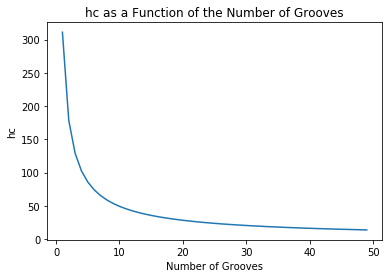

In [41]:
plt.plot(n, hc(n,wprime*depth))
plt.title('hc as a Function of the Number of Grooves')
plt.xlabel('Number of Grooves')
plt.ylabel('hc')
plt.show()

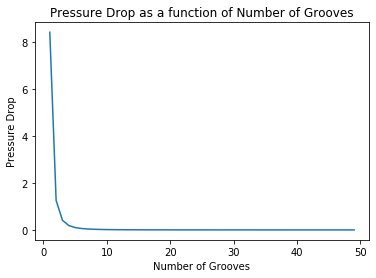

In [44]:
dp = []

for i in range(len(n)):

    value=(0.316*mdot**(7/4)*L*pi*D*(wprime + depth)**(5/4)*mu**(1/4)*2**(3/4))/(8*(wprime+uprime)*(wprime*depth)**(3)*rho*n[i]**(11/4))
    
    dp.append(value)

plt.plot(n, dp)
plt.title('Pressure Drop as a function of Number of Grooves')
plt.xlabel('Number of Grooves')
plt.ylabel('Pressure Drop')
plt.show()